In [1]:
import sys
import os
workPath = os.path.abspath('..')
if not workPath in sys.path:
    sys.path.append(workPath)

In [2]:
from everest import mpi
import os
if mpi.rank == 0:
    if os.path.exists('../test.frm'):
        os.remove('../test.frm')

In [3]:
from planetengine.systems.isovisc import build as isovisc
from planetengine.params import build as params
from planetengine.configs import build as configs
from planetengine.initials.sinusoidal import build as sinusoidal
from planetengine.initials.constant import build as constant
from planetengine.initials.load import build as load
from planetengine.states.threshold import build as threshold

In [4]:
task = isovisc(res = 32) \
    [params(Ra = 1e5)] \
    [configs(temperatureField = sinusoidal(), temperatureDotField = constant())] \
    [threshold(val = 10)]
task.anchor('test', '..')

In [5]:
task()

In [6]:
task2 = isovisc(res = 64) \
    [params(Ra = 1e5)] \
    [configs(temperatureField = load(real = task.arg, varName = 'temperatureField'), temperatureDotField = constant())] \
    [threshold(val = 10)]
task2.anchor('test', '..')

In [7]:
from planetengine import quickShow

Variable{-9223363298644674237}



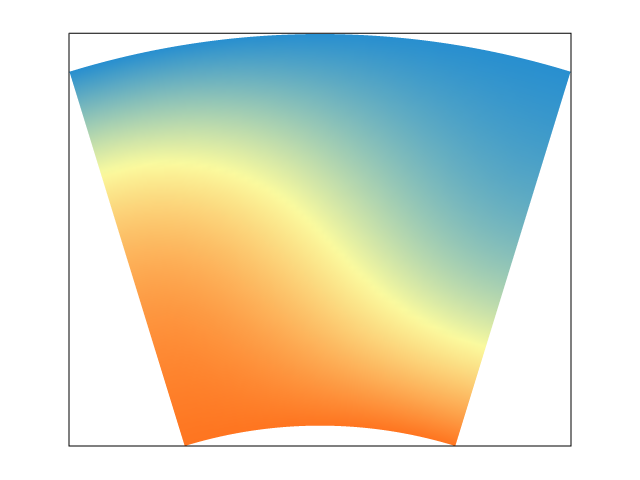

In [8]:
quickShow(task2.arg.varsOfState['temperatureField'])